In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.cluster import KMeans

class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('sample_data/wine.csv')

# Separar características y clases
X = df.drop('Class', axis=1)
y = df['Class']

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular importancia con ANOVA F-test - analisis de la varianza
f_scores, _ = f_classif(X_scaled, y)
feature_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)

# Selección de columnas
top_3 = feature_scores.head(3).index.tolist()
top_2 = feature_scores.head(2).index.tolist()
top_5 = feature_scores.head(5).index.tolist()
bottom_3 = feature_scores.tail(3).index.tolist()

In [ ]:
# Datos del nuevo vino de banano
nuevo_vino = pd.DataFrame([{
    'Class': 4,
    'Alcohol': 14.03,
    'Malic acid': 1.71,
    'Ash': 2.41,
    'Alcalinity of ash': 15.5,
    'Magnesium': 126,
    'Total phenols': 2.79,
    'Flavanoids': 3.05,
    'Nonflavanoid phenols': 0.3,
    'Proanthocyanins': 2.3,
    'Color intensity': 5.57,
    'Hue': 1.04,
    'OD280/OD315 of diluted wines': 3.82,
    'Proline': 1062
}])

In [ ]:
def predecir_cluster_y_clase(columnas):
    X_sel = X[columnas]
    nuevo_sel = nuevo_vino[columnas]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sel)
    nuevo_scaled = scaler.transform(nuevo_sel)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    etiquetas_clusters = kmeans.fit_predict(X_scaled)

    # Asignar clase dominante a cada clúster
    cluster_df = pd.DataFrame({'Cluster': etiquetas_clusters, 'Clase': y})
    clase_dominante = cluster_df.groupby('Cluster')['Clase'].agg(lambda x: x.mode()[0])

    # Predecir clúster del nuevo vino
    cluster_pred = kmeans.predict(nuevo_scaled)[0]
    clase_pred = clase_dominante.loc[cluster_pred]

    return cluster_pred, clase_pred

In [ ]:
cluster_top3, clase_top3 = predecir_cluster_y_clase(top_3)
cluster_top2, clase_top2 = predecir_cluster_y_clase(top_2)
cluster_top5, clase_top5 = predecir_cluster_y_clase(top_5)
cluster_bottom3, clase_bottom3 = predecir_cluster_y_clase(bottom_3)

print("🔍 Clasificación del nuevo vino de banano:")
print(f"Top 3 características: Clúster {cluster_top3} → Clase {clase_top3}")
print(f"Top 2 características: Clúster {cluster_top2} → Clase {clase_top2}")
print(f"Top 5 características: Clúster {cluster_top5} → Clase {clase_top5}")
print(f"Peores 3 características: Clúster {cluster_bottom3} → Clase {clase_bottom3}")

🔍 Clasificación del nuevo vino de banano:
Top 3 características: Clúster 1 → Clase 1
Top 2 características: Clúster 1 → Clase 1
Top 5 características: Clúster 1 → Clase 1
Peores 3 características: Clúster 2 → Clase 1


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]
(178, 2)


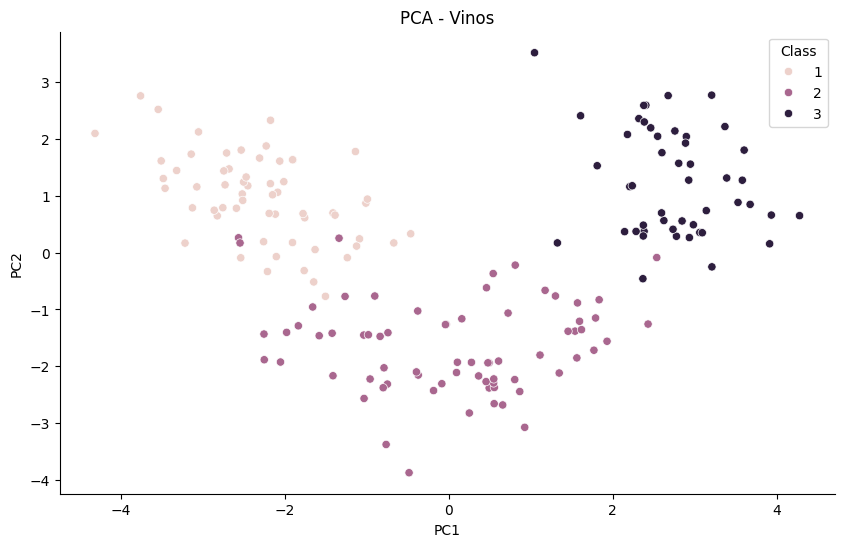

In [ ]:
# Cargar características
X = df.drop("Class", axis=1)

# Crear el objeto PCA
pca = PCA(n_componentes=2)

# Ejecutar
pca_resultado = pca.run(X)

# Dibujar (si tienes la columna de clases)
pca.dibujar("PCA - Vinos", ["PC1", "PC2"], df["Class"], pca_resultado)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]
(178, 2)


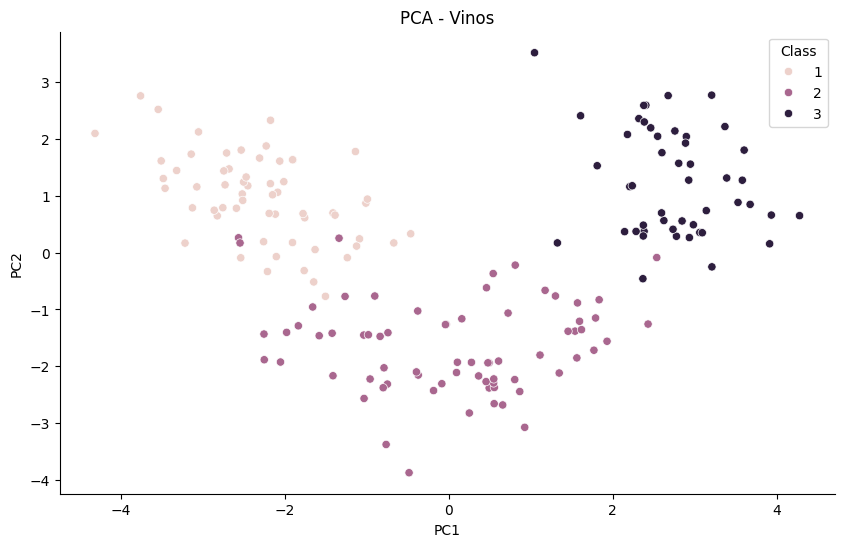

In [ ]:
# Supongamos que ya tienes el DataFrame cargado como df
X = df.drop("Class", axis=1)
y = df["Class"]

pca = PCA(n_componentes=2)
pca_resultado = pca.run(X)
pca.dibujar("PCA - Vinos", ["PC1", "PC2"], y, pca_resultado)


In [ ]:
# Importar clase si está en otro archivo, o ya deberías tenerla definida en tu script
# from pca_custom import PCA

# Seleccionamos las 3 mejores características
X_top3 = X[top_3]
nuevo_top3 = nuevo_vino[top_3]

# Creamos una instancia de PCA con 2 componentes
mi_pca = PCA(n_componentes=2)

# Ejecutamos PCA en los datos seleccionados
X_top3_pca = mi_pca.run(X_top3.values)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 2]


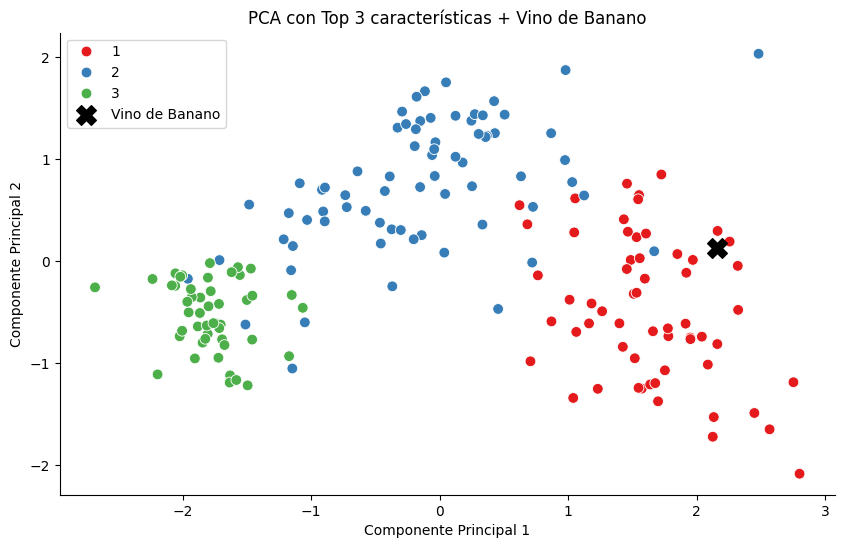

In [ ]:
# Estandarizamos el nuevo vino con la misma media y std que los datos originales
nuevo_top3_std = (nuevo_top3.values - np.mean(X_top3.values, axis=0)) / np.std(X_top3.values, axis=0)

# Lo proyectamos usando los vectores de características ya entrenados
vino_banano_proj = np.dot(nuevo_top3_std, mi_pca.vector_caracteristica)

# Dibujar con el vino de banano incluido
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_top3_pca[:,0], y=X_top3_pca[:,1], hue=y, palette='Set1', s=60)
plt.scatter(vino_banano_proj[0,0], vino_banano_proj[0,1], color='black', s=200, marker='X', label='Vino de Banano')
plt.title("PCA con Top 3 características + Vino de Banano")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
sns.despine()
plt.show()